# Simple LSTM

## 1) data 는 0 ~ 99 까지의 연속된 숫자이고, target 은 (1 ~ 101) * 2 으로 구성한다. 입력  data 에 대응하는 출력 data 를 예측하는 model 을 LSTM 으로 작성

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

In [2]:
data = np.array([i * 1.0 for i in range(100)])
target = np.array([i * 2.0 for i in range(1, 101)])
print(data)
print(target)

[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17.
 18. 19. 20. 21. 22. 23. 24. 25. 26. 27. 28. 29. 30. 31. 32. 33. 34. 35.
 36. 37. 38. 39. 40. 41. 42. 43. 44. 45. 46. 47. 48. 49. 50. 51. 52. 53.
 54. 55. 56. 57. 58. 59. 60. 61. 62. 63. 64. 65. 66. 67. 68. 69. 70. 71.
 72. 73. 74. 75. 76. 77. 78. 79. 80. 81. 82. 83. 84. 85. 86. 87. 88. 89.
 90. 91. 92. 93. 94. 95. 96. 97. 98. 99.]
[  2.   4.   6.   8.  10.  12.  14.  16.  18.  20.  22.  24.  26.  28.
  30.  32.  34.  36.  38.  40.  42.  44.  46.  48.  50.  52.  54.  56.
  58.  60.  62.  64.  66.  68.  70.  72.  74.  76.  78.  80.  82.  84.
  86.  88.  90.  92.  94.  96.  98. 100. 102. 104. 106. 108. 110. 112.
 114. 116. 118. 120. 122. 124. 126. 128. 130. 132. 134. 136. 138. 140.
 142. 144. 146. 148. 150. 152. 154. 156. 158. 160. 162. 164. 166. 168.
 170. 172. 174. 176. 178. 180. 182. 184. 186. 188. 190. 192. 194. 196.
 198. 200.]


In [3]:
data = data / 100
target = target / 100

data = data.reshape(1, 100, 1)
target = target.reshape(1, 100)

In [4]:
target.shape

(1, 100)

In [5]:
model = Sequential()
model.add(LSTM(32, input_shape=(100, 1), return_sequences=True))
model.add(Dense(1))

model.compile(loss='mae', optimizer='adam', metrics=['mae'])
history = model.fit(data, target, epochs=1500, verbose=2)

Epoch 1/1500
1/1 - 0s - loss: 1.0343 - mae: 1.0343
Epoch 2/1500
1/1 - 0s - loss: 1.0121 - mae: 1.0121
Epoch 3/1500
1/1 - 0s - loss: 0.9895 - mae: 0.9895
Epoch 4/1500
1/1 - 0s - loss: 0.9664 - mae: 0.9664
Epoch 5/1500
1/1 - 0s - loss: 0.9427 - mae: 0.9427
Epoch 6/1500
1/1 - 0s - loss: 0.9184 - mae: 0.9184
Epoch 7/1500
1/1 - 0s - loss: 0.8934 - mae: 0.8934
Epoch 8/1500
1/1 - 0s - loss: 0.8676 - mae: 0.8676
Epoch 9/1500
1/1 - 0s - loss: 0.8408 - mae: 0.8408
Epoch 10/1500
1/1 - 0s - loss: 0.8130 - mae: 0.8130
Epoch 11/1500
1/1 - 0s - loss: 0.7839 - mae: 0.7839
Epoch 12/1500
1/1 - 0s - loss: 0.7534 - mae: 0.7534
Epoch 13/1500
1/1 - 0s - loss: 0.7212 - mae: 0.7212
Epoch 14/1500
1/1 - 0s - loss: 0.6870 - mae: 0.6870
Epoch 15/1500
1/1 - 0s - loss: 0.6504 - mae: 0.6504
Epoch 16/1500
1/1 - 0s - loss: 0.6111 - mae: 0.6111
Epoch 17/1500
1/1 - 0s - loss: 0.5685 - mae: 0.5685
Epoch 18/1500
1/1 - 0s - loss: 0.5222 - mae: 0.5222
Epoch 19/1500
1/1 - 0s - loss: 0.4715 - mae: 0.4715
Epoch 20/1500
1/1 - 0

In [6]:
y_pred = model.predict(data) 

In [13]:
print(data[0][-10:] * 100)
print(y_pred[0][-10:] * 100)

[[90.]
 [91.]
 [92.]
 [93.]
 [94.]
 [95.]
 [96.]
 [97.]
 [98.]
 [99.]]
[[180.67014]
 [182.56761]
 [184.45575]
 [186.33403]
 [188.202  ]
 [190.05919]
 [191.90504]
 [193.73914]
 [195.56104]
 [197.37024]]


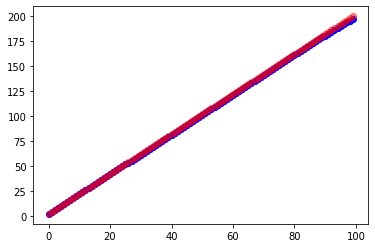

In [27]:
plt.scatter(data * 100, y_pred * 100, marker='o', c='b')
plt.scatter(data * 100, target * 100, marker='o', alpha=0.5, c='r')
plt.show()

### 연속된 5 개의 숫자를 보고 다음 숫자를 알아맞추도록 LSTM 을 이용한 model 작성

### Training Data 작성 요령

In [28]:
from sklearn.model_selection import train_test_split

In [29]:
Numbers = [[i] for i in range(105)]

Data = []
Target = []
for i in range(5, len(Numbers)):
    Data.append(Numbers[i-5: i])
    Target.append([Numbers[i][0] * 2])

print(Data[5])
print(Target[5])

[[5], [6], [7], [8], [9]]
[20]


In [30]:
# List --> numpy ndarray 변환
Data = np.array(Data)
Target = np.array(Target)

# Normalize
Data = Data / 100.
Target = Target / 100.

In [31]:
Data.shape

(100, 5, 1)

In [33]:
Target.shape

(100, 1)

In [34]:
X_train, X_test, y_train, y_test = train_test_split(Data, Target, test_size=0.2, random_state=0)

In [35]:
model = Sequential()
model.add(LSTM(16, input_shape=(5, 1)))
model.add(Dense(1))

In [36]:
model.compile(optimizer='adam', loss='mae', metrics=['mae'])

In [37]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 16)                1152      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 17        
Total params: 1,169
Trainable params: 1,169
Non-trainable params: 0
_________________________________________________________________


In [38]:
history = model.fit(X_train, y_train, epochs=500, validation_split=0.2)

Epoch 1/500
2/2 [==============================] - 1s 268ms/step - loss: 1.0623 - mae: 1.0623 - val_loss: 1.1739 - val_mae: 1.1739
Epoch 2/500
2/2 [==============================] - 0s 24ms/step - loss: 1.0416 - mae: 1.0416 - val_loss: 1.1515 - val_mae: 1.1515
Epoch 3/500
2/2 [==============================] - 0s 22ms/step - loss: 1.0206 - mae: 1.0206 - val_loss: 1.1293 - val_mae: 1.1293
Epoch 4/500
2/2 [==============================] - 0s 22ms/step - loss: 0.9996 - mae: 0.9996 - val_loss: 1.1070 - val_mae: 1.1070
Epoch 5/500
2/2 [==============================] - 0s 22ms/step - loss: 0.9790 - mae: 0.9790 - val_loss: 1.0847 - val_mae: 1.0847
Epoch 6/500
2/2 [==============================] - 0s 25ms/step - loss: 0.9577 - mae: 0.9577 - val_loss: 1.0624 - val_mae: 1.0624
Epoch 7/500
2/2 [==============================] - 0s 22ms/step - loss: 0.9369 - mae: 0.9369 - val_loss: 1.0400 - val_mae: 1.0400
Epoch 8/500
2/2 [==============================] - 0s 24ms/step - loss: 0.9162 - mae: 0.9

In [39]:
result = model.predict(X_test)

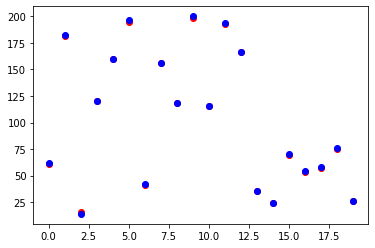

In [45]:
plt.scatter(np.arange(len(result)), result * 100, c='r')
plt.scatter(np.arange(len(result)), y_test * 100, c='b')

In [50]:
test_data = [[35], [36], [37], [38], [39]]

x = np.array(test_data) / 100.

model.predict(x.reshape(1, 5, 1)) * 100

array([[79.369125]], dtype=float32)